# NeuroConn : BIDS-compatible fMRI Connectivity Toolbox

In [1]:
!pip install NeuroConn

Most common tasks in connectivity analyses:
- Preprocessing: motion correction, bandpass filtering, defacing, etc.
- Parcellate time-series: extract the signal from regions as defined by an atlas
- Compute connectivity matrix
- Dimensionality reduction of connectivity data (e.g., cortical gradients)

In [1]:
from NeuroConn.preprocessing.preprocessing import RawDataset, FmriPreppedDataSet
from NeuroConn.data.example_datasets import fetch_example_data
from NeuroConn.gradient.gradient import get_gradients

## I. Preprocessing w/ fMRIPrep on a Docker Container
<img src="https://github.com/oesteban/fmriprep/raw/f4c7a9804be26c912b24ef4dccba54bdd72fa1fd/docs/_static/fmriprep-21.0.0.svg" width="50%"> <img src=https://storage.googleapis.com/static.ianlewis.org/prod/img/docker/large_v-trans.png width="20%">


In [2]:
# fetch example dataset. Note: the example dataset only contains two subjects: 52 and 53.
data = fetch_example_data()
data_raw = RawDataset(data)
print(data_raw)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ijrYstMmsjMmQcM9ThoVf_dMYl9GFcv6
From (redirected): https://drive.google.com/uc?id=1ijrYstMmsjMmQcM9ThoVf_dMYl9GFcv6&confirm=t&uuid=e5675aa7-7526-4ea6-b9b8-468ee39cd72c
To: /Users/VictoriaShevchenko/Documents/PyConn/PyConn/data/example_data.zip
100%|██████████| 66.4M/66.4M [00:01<00:00, 44.2MB/s]


Data downloaded.
Dataset(Name=Resting state with closed eyes for patients with depression and healthy participants,
Subjects=['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56'
 '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70'
 '71' '72'],
Data_Path=/Users/VictoriaShevchenko/Documents/PyConn/PyConn/data/example_data)


In [ ]:
# Requirements:
# - Install Docker Desktop: https://www.docker.com/products/docker-desktop/
# - Install fmriprep-docker: python -m pip install --user --upgrade fmriprep-docker
# - Download Freesurfer license: https://surfer.nmr.mgh.harvard.edu/registration.html and specify the link to the license file in the code below

subject = '52'
data_raw.docker_fmriprep(subject, fs_reconall = False, fs_license_path = '/Users/VictoriaShevchenko/Documents/PyConn/PyConn/preprocessing/freesurfer_license.txt')


### Output of fmriprep run on Docker:
```
230522-11:12:49,990 nipype.workflow IMPORTANT:
	 Running fMRIPrep version 23.0.2

         License NOTICE ##################################################
         fMRIPrep 23.0.2
         Copyright 2023 The NiPreps Developers.
         
         This product includes software developed by
         the NiPreps Community (https://nipreps.org/).
         
         Portions of this software were developed at the Department of
         Psychology at Stanford University, Stanford, CA, US.
         
         This software is also distributed as a Docker container image.
         The bootstrapping file for the image ("Dockerfile") is licensed
         under the MIT License.
         
         This software may be distributed through an add-on package called
         "Docker Wrapper" that is under the BSD 3-clause License.
         #################################################################
230522-11:12:50,90 nipype.workflow IMPORTANT:
	 Building fMRIPrep's workflow:
           * BIDS dataset path: /data.
           * Participant list: ['52'].
           * Run identifier: 20230522-111154_1aafbcd4-06c3-4da2-b800-a1df7848e7f4.
           * Output spaces: MNI152NLin2009cAsym:res-2.
           * Pre-run FreeSurfer's SUBJECTS_DIR: /out/sourcedata/freesurfer.
230522-11:12:59,944 nipype.workflow INFO:
	 No single-band-reference found for sub-52_task-rest_bold.nii.gz.
230522-11:13:00,429 nipype.workflow IMPORTANT:
	 BOLD series will be slice-timing corrected to an offset of 1.2s.
230522-11:13:28,560 nipype.workflow INFO:
	 fMRIPrep workflow graph with 327 nodes built successfully.
Could not generate CITATION.html file:
pandoc -s --bibliography /out/logs/CITATION.bib --citeproc --metadata pagetitle="fMRIPrep citation boilerplate" /out/logs/CITATION.md -o /out/logs/CITATION.html
Could not generate CITATION.tex file:
pandoc -s --bibliography /out/logs/CITATION.bib --natbib /out/logs/CITATION.md -o /out/logs/CITATION.tex
230522-11:14:48,34 nipype.workflow IMPORTANT:
	 fMRIPrep started!
```
etc.
### Result:
<img src="derivatives_fmrirprep.png" width="10%">

## II. Further preprocessing under the hood + connectivity matrix

- The user can keep time-series parcellation implicit and get the connectivity matrix directly

In [31]:
data_prepped = FmriPreppedDataSet(data)
subject = '53'
data_prepped

Subjects=['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56'
 '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70'
 '71' '72'],
 Data_Path=/Users/VictoriaShevchenko/Documents/PyConn/PyConn/data/example_data/derivatives/fmriprep)

[NiftiLabelsMasker.wrapped] loading data from /Users/VictoriaShevchenko/nilearn_data/schaefer_2018/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/Users/VictoriaShevchenko/Documents/PyConn/PyConn/data/example_data/derivatives/fmriprep/sub-53/func/sub-53_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 
<nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x1280bdc50>, { 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': '/Users/VictoriaShevchenko/nilearn_data/schaefer_2018/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_1mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize'

/Users/VictoriaShevchenko/opt/miniconda3/envs/pyconnvenv/lib/python3.11/site-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/Users/VictoriaShevchenko/Documents/PyConn/PyConn/preprocessing/preprocessing.py:367: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  clean_ts = signal.cl

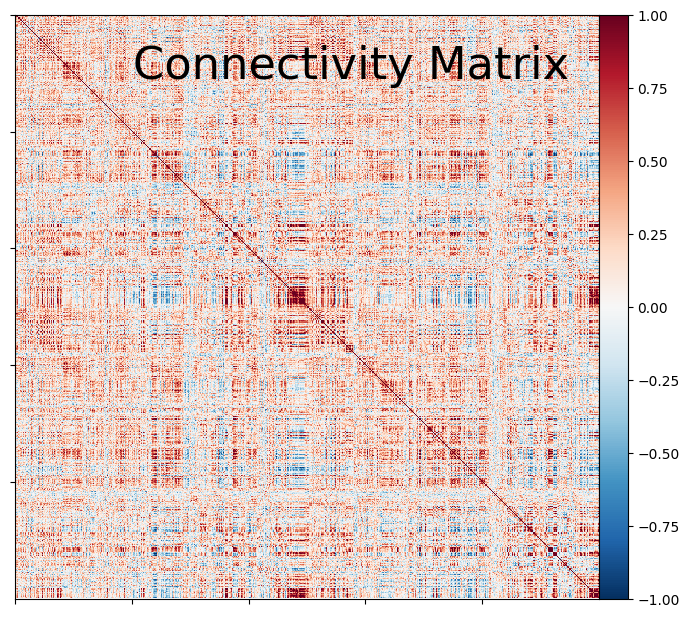

In [32]:
from nilearn import plotting
conn_matrix = data_prepped.get_conn_matrix(subject, parcellation='schaefer', task='rest', n_parcels=1000, save = True)
corr_plot = plotting.plot_matrix(conn_matrix[0], figure=(7, 7),vmax=1, vmin=-1, title = 'Connectivity Matrix')



In [33]:
# Compute gradients
gradients = get_gradients(data_prepped,subject, task='rest', n_components = 10, approach = "dm")

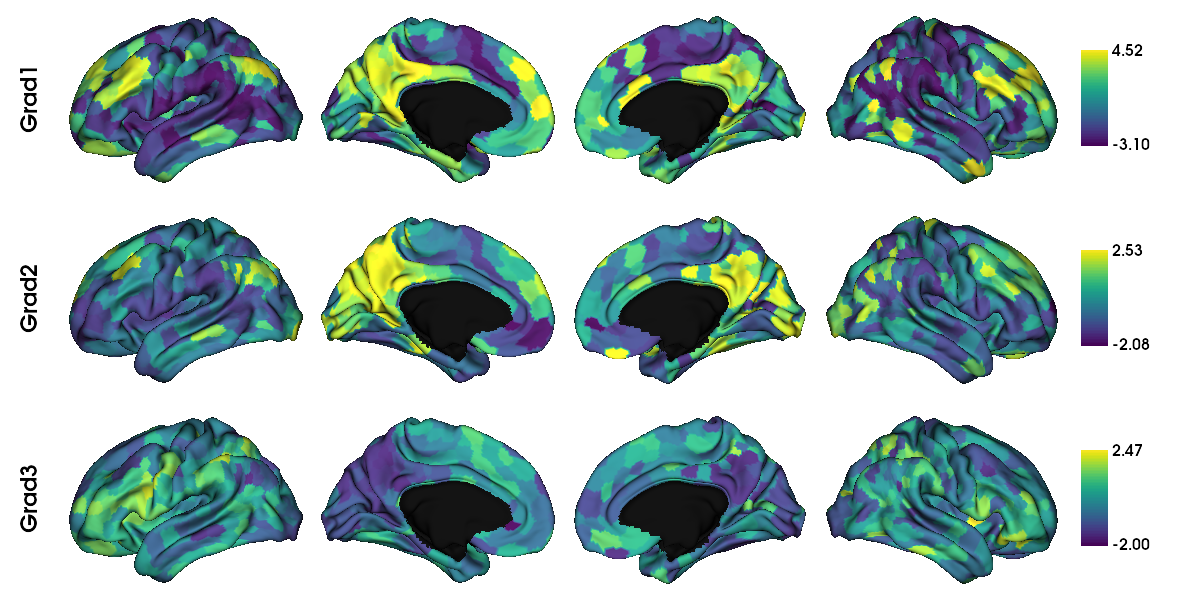

In [34]:
# Plot gradients
import numpy as np
from brainspace.datasets import load_conte69, load_parcellation
from brainspace.utils.parcellation import map_to_labels
from brainspace.plotting import plot_hemispheres
surf_lh, surf_rh = load_conte69()

# Load Schaefer parcellation
schaefer_labels = load_parcellation('schaefer', scale=1000, join=True) # provided you have the Schaefer parcellation files in you brainspace installation folder

grad_subj = [None] * 3
for i, g in enumerate(gradients[0].T[:3]):
    grad_subj[i] = map_to_labels(g, schaefer_labels, mask=schaefer_labels != 0, fill=np.nan)


plot_hemispheres(surf_lh, surf_rh, array_name=grad_subj, size=(1200, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.5, embed_nb = True)

## Data Reference 
Bezmaternykh D.D., Melnikov M.Y., Savelov A.A. et al. Brain Networks Connectivity in Mild to Moderate Depression: Resting State fMRI Study with Implications to Nonpharmacological Treatment. Neural Plasticity, 2021. V. 2021. № 8846097. PP. 1-15. DOI: 10.1155/2021/8846097